In [39]:
import pandas as pd
# Primer paso, importado de los datos

datos = pd.read_csv("Datos/datos.csv")

In [40]:
datos.head(2)

,nom,edad,sex,rel_ctxo_rel_mala,rel_ctxo_trauma,rel_ctxo_buena,ed_perm,ed_norm,ed_estr,resil_ba,...,max_min,conc_arb,pseu_res,deb,raz_emo,inhib,asert,agres,impuls,grupo
0,Elena,20,0,1,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,1
1,Marta,19,0,0,0,1,0,0,1,1,...,1,1,1,1,0,1,0,0,0,2


Eliminación de variables no necesarias: Nombre

In [41]:
datos_mod = datos.iloc[:, -25:-1]

In [42]:
datos_mod.head(2)

,edad,sex,rel_ctxo_rel_mala,rel_ctxo_trauma,rel_ctxo_buena,ed_perm,ed_norm,ed_estr,resil_ba,resil_me,...,fil_men,max_min,conc_arb,pseu_res,deb,raz_emo,inhib,asert,agres,impuls
0,20,0,1,0,0,0,1,0,0,1,...,0,1,1,0,1,1,0,0,1,1
1,19,0,0,0,1,0,0,1,1,0,...,0,1,1,1,1,0,1,0,0,0


Centrado y escalado de los datos debido a la variable EDAD

In [43]:
from sklearn.preprocessing import scale

In [44]:
datos_ml = scale(datos_mod)

D:\Users\jorge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


Ahora que están los datos centrados y escalados y con las variables innecesarias eliminadas, se puede pasar a los métodos de machine learning

In [45]:
# Hay que hacer una separación entre datos de train y test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(datos_ml, datos.iloc[:, 25], random_state=97)

Las redes neuronales han sido desarrolladas en R, así como todo el análisis de datos. A continuación desarrollaré el resto de métodos:

                                                                                        KNN

In [46]:
# Se hace una grid para comprobar cuales serán los mejores parámetros

from sklearn.model_selection import GridSearchCV

grid_knn = {
    'n_neighbors' : range(1, 15),
    'metric' : ['euclidean', 'manhattan']
}

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = GridSearchCV(KNeighborsClassifier(), grid_knn, cv = 3, scoring='accuracy')

In [48]:
knn.fit(x_train, y_train)

D:\Users\jorge\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 15), 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [49]:
knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 12}

In [50]:
from sklearn.model_selection import cross_val_score

knn = knn.best_estimator_.fit(x_train, y_train)

puntuacion = knn.score(x_train, y_train)

print("La puntuación máxima conseguida en train es: {:.1f}".format(puntuacion)) 

puntuacion = knn.score(x_test, y_test)

print("La puntuación máxima conseguida en test es: {:.1f}".format(puntuacion)) 

La puntuación máxima conseguida en train es: 0.5
La puntuación máxima conseguida en test es: 0.5


In [75]:
from sklearn.metrics import confusion_matrix

In [79]:
print(confusion_matrix(y_test, knn.predict(x_test)))

[[2 1 0 1]
 [1 7 0 0]
 [0 1 0 0]
 [3 1 0 0]]


                                                                                    Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
randomForest_grid = RandomForestClassifier(random_state=97)

grid_rf = { 
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : range(5, 15),
    'criterion' :['gini', 'entropy']
}

#CV por defecto de 3

randomForest = GridSearchCV(estimator=randomForest_grid, param_grid=grid_rf, cv = 3)

In [52]:
randomForest.fit(x_train, y_train)

randomForest.best_params_

D:\Users\jorge\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [53]:
print(randomForest.best_estimator_)
print("")

randomForest = randomForest.best_estimator_.fit(x_train, y_train)

print("Clasificación Random Forest Grid CV 5")

puntuacion = randomForest.score(x_train, y_train)

print("La puntuación en tanto por 1 de train de: {:.3f}".format(puntuacion))

puntuacion = randomForest.score(x_test, y_test)

print("La puntuación en tanto por 1 de test es de: {:.3f}".format(puntuacion))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=97, verbose=0, warm_start=False)

Clasificación Random Forest Grid CV 5
La puntuación en tanto por 1 de train de: 0.920
La puntuación en tanto por 1 de test es de: 0.471


In [80]:
print(confusion_matrix(y_test, randomForest.predict(x_test)))

[[1 2 0 1]
 [2 6 0 0]
 [0 1 0 0]
 [1 2 0 1]]


                                                                                        SVM

In [69]:
from sklearn import svm

In [70]:
parametros = {
    'kernel':('linear', 'rbf', 'poly'),
    'C':range(1, 10),
    'degree': range(2, 5),
    
}

svc_grid = svm.SVC(gamma="scale", random_state=97)
svc_grid = GridSearchCV(svc_grid, parametros, cv=3)
svc_grid.fit(x_train, y_train)
svc_grid.best_params_

D:\Users\jorge\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 2, 'degree': 2, 'kernel': 'rbf'}

In [71]:
print("Clasificación SVM Grid CV 3")

svc_grid = svc_grid.best_estimator_.fit(x_train, y_train)

puntuacion = svc_grid.score(x_train, y_train)

print("La puntuación del train en tanto por 1 es de: {:.3f}".format(puntuacion))

puntuacion = svc_grid.score(x_test, y_test)

print("La puntuación del test en tanto por 1 es de: {:.3f}".format(puntuacion))

Clasificación SVM Grid CV 3
La puntuación del train en tanto por 1 es de: 0.880
La puntuación del test en tanto por 1 es de: 0.412


In [81]:
print(confusion_matrix(y_test, svc_grid.predict(x_test)))

[[1 2 0 1]
 [2 6 0 0]
 [0 1 0 0]
 [1 3 0 0]]


                                                                                            Dendrograma

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [ ]:
linked = linkage(datos_mod, 'single')

labelList = range(1, 4)

plt.figure(figsize=(500, 500))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

plt.savefig("Imágenes Obtenidas/clustering jerárquico.png")
plt.show()

                                                                                            K-Means

In [72]:
from sklearn.cluster import KMeans

In [73]:
# 4 clusters, uno para cada grupo

kmeans = KMeans(n_clusters=4, random_state=97)

kmeans_model = kmeans.fit(x_train, y_train)

In [74]:
prediction_kmeans = kmeans_model.predict(x_test)

kmeans_model.cluster_centers_

array([[-0.73559281,  0.22393804, -0.10066827,  0.50428397, -0.4149716 ,
         1.58943883, -0.98518437, -0.53708616,  0.67175988, -0.64456732,
        -0.12309149,  0.0146385 ,  0.21650635,  0.12347898,  0.26799143,
         0.1754116 ,  0.12309149, -0.61499388, -0.59214434,  0.51395617,
         0.09116072, -0.3939193 ,  0.18260929, -0.22971146],
       [ 0.87158615,  0.18880023,  0.4439408 ,  0.44469486, -0.72929232,
         0.00473047,  0.30067315, -0.3657301 , -1.14470294,  1.18019369,
        -0.12309149, -0.59251076, -0.47425201, -0.73009398, -0.71586752,
        -0.24432331,  0.12309149, -0.15780009,  0.25197632, -0.18880023,
        -0.02918939,  0.23447577, -0.19437404, -0.08313367],
       [ 0.03983879, -0.07990075, -0.22141869, -0.50172044,  0.63220387,
        -0.62915287,  1.01503844, -0.53708616,  0.39869685, -0.37025684,
        -0.12309149,  0.34156503,  0.21650635,  0.58309519,  0.22458589,
         0.1754116 ,  0.12309149,  0.39688354,  0.00370553,  0.22458589,
  

Para hacer plotting, tengo que reducir a dos dimensiones y entonces mostrarlo:

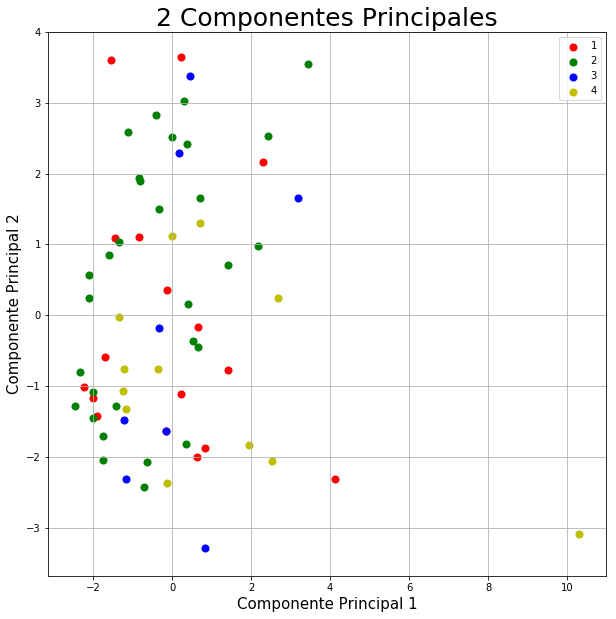

In [106]:
# Esta representación no es la de KMeans, sino la real sobre las dos dimensiones más significativas

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

comp_p = pca.fit_transform(datos_ml)
df_pca_2 = pd.DataFrame(data = comp_p, columns = ['Componente Principal 1', 'Componente Principal 2'])

df_pca_2 = pd.concat([df_pca_2, datos.iloc[:, 25]], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('2 Componentes Principales', fontsize = 25)
targets = [1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca_2.iloc[:, 2] == target
    ax.scatter(df_pca_2.loc[indicesToKeep, 'Componente Principal 1'], df_pca_2.loc[indicesToKeep, 'Componente Principal 2']
               ,c = color ,s = 50)
    
ax.legend(targets)
plt.savefig("Imágenes Obtenidas/Plot Kmeans.png")
ax.grid()

Se puede observar claramente que es un problema dificilmente clasificable, al menos en dos dimensiones

                                                                                Minería de Reglas

In [86]:
from apyori import apriori

In [87]:
association_rules = apriori(datos, min_support=0.01, min_confidence=0.5, min_lift=3, min_length=2) 

In [88]:
reglas = list(association_rules)

In [89]:
for i in range(0, 20):
    regla = reglas[i]
    supp = int(regla.support*10000)/100
    conf = int(regla.ordered_statistics[0].confidence*100)
    hypo = ''.join([x+' ' for x in regla.ordered_statistics[0].items_base])
    conc = ''.join([x+' ' for x in regla.ordered_statistics[0].items_add])
    print("Si " + str(hypo) + " ocurre --> " + str(conf) + " % que " + str(conc) + " ocurra [support = " + str(supp) + "%]")

Si h  ocurre --> 100 % que b  ocurra [support = 3.84%]
Si f  ocurre --> 100 % que l  ocurra [support = 3.84%]
Si z  ocurre --> 100 % que o  ocurra [support = 3.84%]
Si p  ocurre --> 60 % que u  ocurra [support = 11.53%]
Si q  ocurre --> 100 % que t  ocurra [support = 3.84%]
Si h    ocurre --> 100 % que b  ocurra [support = 3.84%]
Si f    ocurre --> 100 % que l  ocurra [support = 3.84%]
Si z    ocurre --> 100 % que o  ocurra [support = 3.84%]
Si p    ocurre --> 60 % que u  ocurra [support = 11.53%]
Si q    ocurre --> 100 % que t  ocurra [support = 3.84%]
Si b _  ocurre --> 66 % que c  ocurra [support = 7.69%]
Si o _  ocurre --> 66 % que c  ocurra [support = 15.38%]
Si t _  ocurre --> 75 % que c  ocurra [support = 11.53%]
Si _ u  ocurre --> 66 % que c  ocurra [support = 7.69%]
Si _ x  ocurre --> 60 % que c  ocurra [support = 11.53%]
Si f _  ocurre --> 100 % que l  ocurra [support = 3.84%]
Si _ g  ocurre --> 100 % que x  ocurra [support = 3.84%]
Si _ z  ocurre --> 100 % que o  ocurra [sup